In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from statannot import add_stat_annotation
warnings.filterwarnings('ignore')

In [2]:
path = '/Users/maayanbaron/Documents/Data/desmosomes/dndscv/dndscv_skcm_primary.csv'
dndscv_primary = pd.read_csv(path,index_col=0)

path = '/Users/maayanbaron/Documents/Data/desmosomes/dndscv/dndscv_skcm_met.csv'
dndscv_met = pd.read_csv(path,index_col=0)

path = '/Users/maayanbaron/Documents/Data/desmosomes/dndscv/dndscv_skcm_all.csv'
dndscv_all = pd.read_csv(path,index_col=0)

In [7]:
len(des_genes)

12

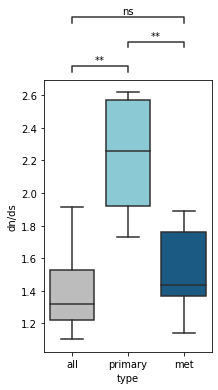

In [3]:
des_genes = ['DSP','DSC1','DSC2','DSC3','DSG1','DSG2','DSG3','DSG4','PKP1','PKP2', 'PKP3','JUP']
dnds_des = pd.DataFrame(index=des_genes,columns=['all','primary','met'])
dnds_des['all'] = dndscv_all.loc[des_genes,'wmis_cv']
dnds_des['primary'] = dndscv_primary.loc[des_genes,'wmis_cv']
dnds_des['met'] = dndscv_met.loc[des_genes,'wmis_cv']

dnds_des = pd.melt(dnds_des,ignore_index=False)
dnds_des.columns = ['type','dn/ds']
dnds_des = dnds_des[dnds_des['dn/ds']>1]

colors_mp = ["#Bcbcbc","#7fd2e0","#095e94"]
data = dnds_des
x = 'type'
y = 'dn/ds'
box_pairs = [("all","primary"),("met","primary"),("all","met")]


plt.figure(figsize=(3,5))
ax = sns.boxplot(data=data,x=x,y=y,palette=colors_mp);
test_results = add_stat_annotation(ax, data=data, x=x, y=y,
                                   box_pairs=box_pairs,
                                   test='t-test_ind', text_format='star',comparisons_correction=None,
                                   loc='outside', verbose=0)
plt.savefig('/Users/maayanbaron/Documents/Data/desmosomes/dndscv/dn_ds_primaryVsmet.pdf',dpi=600,bbox_inches='tight')

In [132]:
#checking all cancer TCGA cohorts
from os import listdir
dnds_dir = '/Users/maayanbaron/Documents/Data/desmosomes/dndscv/dndscv_output/'
dnds_files_list = listdir(dnds_dir)

cohort_names = []
for name in dnds_files_list:
    cohort_names.append(name.split('.')[0].split('_')[0])
    
des_genes = ['DSP','DSC1','DSC2','DSC3','DSG1','DSG2','DSG3','DSG4','PKP1','PKP2', 'PKP3','JUP']

des_all_cancer = pd.DataFrame(index=des_genes,columns=cohort_names)

for file in dnds_files_list:
    path = '/Users/maayanbaron/Documents/Data/desmosomes/dndscv/dndscv_output/'+ file
    df = pd.read_csv(path,index_col=0)
    des_all_cancer.loc[des_genes,file.split('_')[0]] = df.loc[des_genes,'wmis_cv']

In [147]:
sig_cancers = ['skcm','dlbc','gbm','lgg','luad','ov','ucec','lusc','blca','stad','cesc']

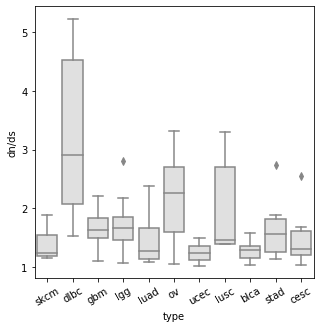

In [149]:
des_sig_cancer = des_all_cancer[sig_cancers]
des_all_cancer_melt = pd.melt(des_sig_cancer,ignore_index=False)
des_all_cancer_melt.columns = ['type','dn/ds']
des_all_cancer_melt = des_all_cancer_melt[des_all_cancer_melt['dn/ds']>1]

data = des_all_cancer_melt
x = 'type'
y = 'dn/ds'
plt.figure(figsize=(5,5))
ax = sns.boxplot(data=data,x=x,y=y,color='#E0E0E0');
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

In [128]:
des_all_cancer_melt[des_all_cancer_melt['type']=='kich']

,type,dn/ds
DSP,kich,2.61806
DSC3,kich,9.19598
DSG1,kich,8.0836
DSG2,kich,7.47636
DSG4,kich,7.69776
